In [1]:
import pandas as pd
import numpy as np
import os

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv"
covid19 = pd.read_csv(url,index_col=0,parse_dates=[0])
covid19.reset_index(level=0, inplace=True)
covid19.tail(5)

,Date,Country,Confirmed,Recovered,Deaths
13389,2020-04-04,Venezuela,155,52,7
13390,2020-04-04,Vietnam,240,90,0
13391,2020-04-04,West Bank and Gaza,217,21,1
13392,2020-04-04,Zambia,39,2,1
13393,2020-04-04,Zimbabwe,9,0,1


# Growth Factor = No. of new cases today / No. of new cases yesterday

In [3]:
overall_counts = covid19[['Confirmed', 'Date']].groupby(by = ['Date'], as_index = False).sum()
overall_counts.sort_values(by = ['Date'], inplace=True)
overall_counts = overall_counts.reset_index(drop = True)

moving_avg = 9
for i in range(moving_avg):
    overall_counts['moving_avg' + str(i)] = overall_counts['Confirmed']
    for j in range(1, i):
        overall_counts['moving_avg' + str(i)] += overall_counts['Confirmed'].shift(j)
    overall_counts['moving_avg' + str(i)] = overall_counts['moving_avg' + str(i)] / (i + 1)
    overall_counts['diff_' + str(i)] = overall_counts['moving_avg' + str(i)].diff()
    overall_counts['diff_shift_' + str(i)] = overall_counts['diff_' + str(i)].shift()
    overall_counts['growth_factor_smooth_' + str(i)] = (overall_counts['diff_' + str(i)]/overall_counts['diff_shift_' + str(i)]).fillna(0)
    overall_counts['growth_factor_smooth_' + str(i)] = overall_counts['growth_factor_smooth_' + str(i)].round(decimals = 3)

overall_counts.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\khtur\Anaconda3\envs\py37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Global Covid 19 confirmed cases Growth Factor')

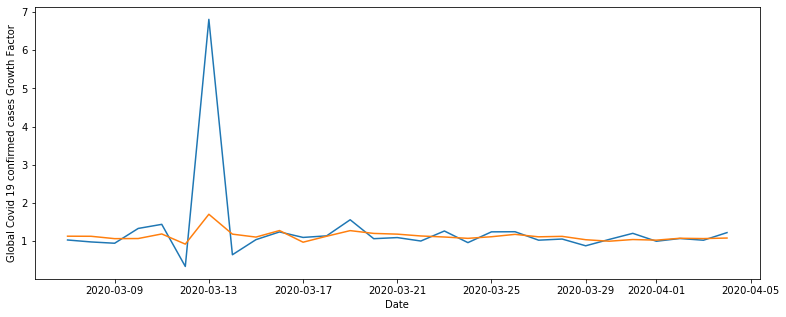

In [4]:
tmp2 = overall_counts[overall_counts['Date'] > '2020-03-06']
fig, ax = plt.subplots(figsize=(13, 5))
plt.plot(tmp2['Date'], tmp2['growth_factor_smooth_0'])
plt.plot(tmp2['Date'], tmp2['growth_factor_smooth_4'])
plt.xlabel('Date')
plt.ylabel("Global Covid 19 confirmed cases Growth Factor")

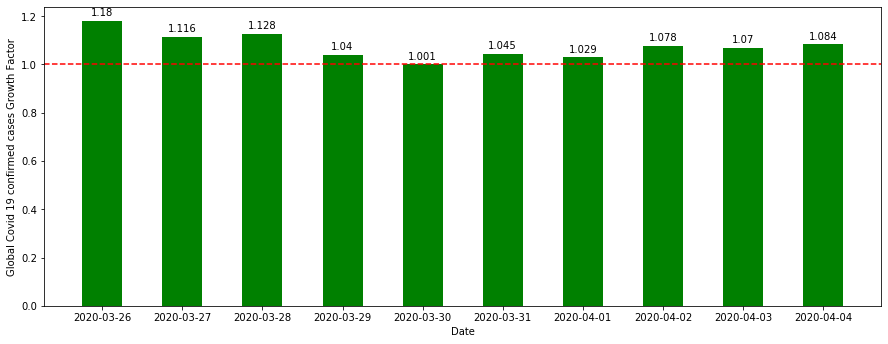

In [5]:
tmp2 = overall_counts[overall_counts['Date'] > '2020-03-25']
fig, ax = plt.subplots(figsize=(15, 5.5))
bars = ax.bar(tmp2['Date'], tmp2['growth_factor_smooth_4'], 0.5, color='g', label = 'growth_factor_smooth_4') #, tick_label = tmp2['growth_factor_smooth_5'])
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars)

ax.axhline(y = 1, color = 'r', animated = True, linestyle='dashed')
# ax.text(1, 1, 5, color='blue', fontweight='bold')
plt.xlabel('Date')
plt.ylabel("Global Covid 19 confirmed cases Growth Factor")

plt.show()

In [6]:
def get_top_growth_countries(df):
    df.sort_values(by = ['Country', 'Date'], inplace=True)
    df = df.reset_index(drop = True)
    
    moving_avg = 5
    for i in range(moving_avg):
        df['moving_avg' + str(i)] = df['Confirmed']
        for j in range(1, i):
            df['moving_avg' + str(i)] += df['Confirmed'].shift(j)
        df['moving_avg' + str(i)] = df['moving_avg' + str(i)] / (i + 1)
        df['diff_' + str(i)] = df['moving_avg' + str(i)].diff()
        df['diff_shift_' + str(i)] = df['diff_' + str(i)].shift()
        df['growth_factor_smooth_' + str(i)] = (df['diff_' + str(i)]/df['diff_shift_' + str(i)]).fillna(0)
        df['growth_factor_smooth_' + str(i)] = df['growth_factor_smooth_' + str(i)].round(decimals = 3)
    
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    return df

covid19 = get_top_growth_countries(covid19)

In [7]:
covid19[(covid19['Date'] == '2020-04-04') & (covid19['Confirmed'] > 5000)].sort_values(by = 'growth_factor_smooth_2', ascending = False)[['Country', 'Confirmed', 'growth_factor_smooth_2']].head(5)

,Country,Confirmed,growth_factor_smooth_2
4587,France,90848,4.149
12505,Turkey,23934,1.106
1257,Belgium,18431,1.099
12579,US,308850,1.051
1775,Brazil,10360,1.043


In [8]:
covid19[(covid19['Date'] == '2020-04-04') & (covid19['Confirmed'] > 5000)].sort_values(by = 'growth_factor_smooth_2', ascending = True)[['Country', 'Confirmed', 'growth_factor_smooth_2']].head(5)

,Country,Confirmed,growth_factor_smooth_2
2441,Canada,12978,0.589
11765,Sweden,6443,0.739
2737,China,82543,0.740
6215,Israel,7851,0.744
9397,Norway,5550,0.795


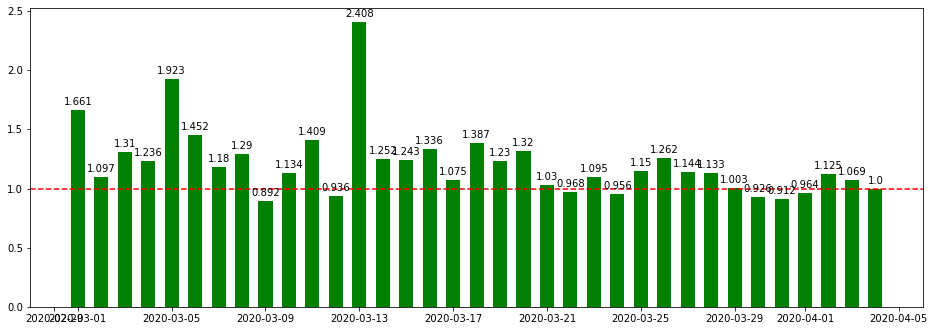

In [9]:
tmp = covid19[(covid19['Country'] == 'Germany')].sort_values(by = 'Confirmed', ascending = True).tail(35)
# tmp['growth_factor_smooth_2'].plot.bar()

fig, ax = plt.subplots(figsize=(16, 5.5))
bars = ax.bar(tmp['Date'], tmp['growth_factor_smooth_4'], 0.6, color='g', label = 'growth_factor_smooth_2') #, tick_label = tmp2['growth_factor_smooth_5'])
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars)

ax.axhline(y = 1, color = 'r', animated = True, linestyle='dashed')
plt.show()

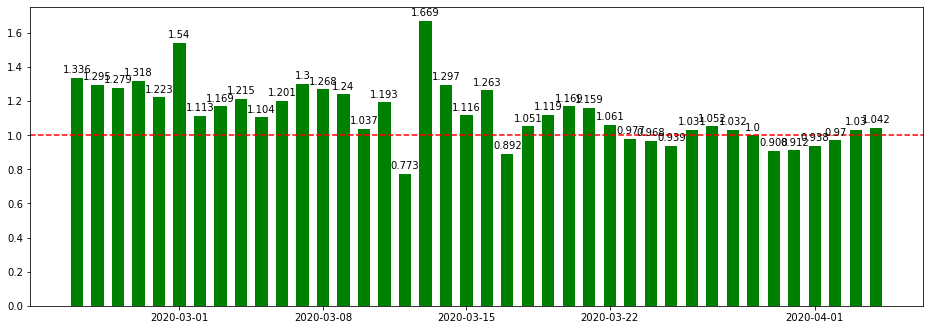

In [10]:
tmp = covid19[(covid19['Country'] == 'Italy')].sort_values(by = 'Confirmed', ascending = True).tail(40)
# tmp['growth_factor_smooth_2'].plot.bar()

fig, ax = plt.subplots(figsize=(16, 5.5))
bars = ax.bar(tmp['Date'], tmp['growth_factor_smooth_4'], 0.6, color='g', label = 'growth_factor_smooth_2') #, tick_label = tmp2['growth_factor_smooth_5'])
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars)

ax.axhline(y = 1, color = 'r', animated = True, linestyle='dashed')
plt.show()